In [1]:
#Загружаем пакеты

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats, integrate
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import networkx as nx

In [2]:
#Создаем граф
G=nx.Graph()
G

In [3]:
#Так к нему можно добавить вершины
G.add_node(1)

In [4]:
#И так тоже
G.add_nodes_from([2,3])

In [5]:
#А так можно добавить ребра
G.add_edge(1,2)

In [6]:
#И так
e=(2,3)
G.add_edge(*e)

In [7]:
#И даже так
G.add_edges_from([(1,2),(1,3)])

In [8]:
#Так мы удаляем вершины (и по аналогии можно удалить и ребра)
G.remove_node(1)

In [9]:
print("В социальной сети {} вершин и {} ребер.".format(G.number_of_nodes(), G.number_of_edges()))

В социальной сети 2 вершин и 1 ребер.


In [10]:
#Просим перечень вершин
G.nodes()

NodeView((2, 3))

In [11]:
#Перечень ребер
G.edges()

EdgeView([(2, 3)])

In [12]:
#Построим сеть?

o=nx.Graph()

o.add_edge('Conrad','Mary')
o.add_edge('Conrad','Cindy')
o.add_edge('Conrad','Alice')
o.add_edge('Alice','Brad')
o.add_edge('Alice','Angie')
o.add_edge('Alice','Jim')
o.add_edge('Cindy','Samuel')
o.add_edge('Cindy','Dave')
o.add_edge('Cindy','Frida')
nx.draw(o)

In [13]:
#Просим степени центральностей для вершин. Нам выдают их в виде словаря (dictionary)
nx.degree(o)

DegreeView({'Conrad': 3, 'Mary': 1, 'Cindy': 4, 'Alice': 4, 'Brad': 1, 'Angie': 1, 'Jim': 1, 'Samuel': 1, 'Dave': 1, 'Frida': 1})

In [14]:
#Все центральности рассчитываются в форме словаря
nx.closeness_centrality(o)

{'Conrad': 0.6,
 'Mary': 0.391304347826087,
 'Cindy': 0.5294117647058824,
 'Alice': 0.5294117647058824,
 'Brad': 0.36,
 'Angie': 0.36,
 'Jim': 0.36,
 'Samuel': 0.36,
 'Dave': 0.36,
 'Frida': 0.36}

In [15]:
nx.betweenness_centrality(o)

{'Conrad': 0.6666666666666666,
 'Mary': 0.0,
 'Cindy': 0.5833333333333333,
 'Alice': 0.5833333333333333,
 'Brad': 0.0,
 'Angie': 0.0,
 'Jim': 0.0,
 'Samuel': 0.0,
 'Dave': 0.0,
 'Frida': 0.0}

In [16]:
nx.eigenvector_centrality(o)

{'Conrad': 0.499998158919723,
 'Mary': 0.21418393983110123,
 'Cindy': 0.4765108374787788,
 'Alice': 0.4765108374787788,
 'Brad': 0.2041249309148119,
 'Angie': 0.2041249309148119,
 'Jim': 0.2041249309148119,
 'Samuel': 0.2041249309148119,
 'Dave': 0.2041249309148119,
 'Frida': 0.2041249309148119}

In [17]:
#Так как Пейджранк можно вычислить только в случае направленного графа, давайте создадим направленный граф
#Он создается с использованием nx.DiGraph - directed graph

G1 = nx.DiGraph(nx.path_graph(4))
pr = nx.pagerank(G1, alpha=0.9)
pr

{0: 0.17241401247723942,
 1: 0.32758598752276064,
 2: 0.32758598752276064,
 3: 0.17241401247723942}

In [18]:
nx.density(o)

0.2

In [19]:
nx.transitivity(o)

0

In [20]:
### Каратэ клуб
### Данные 1970-72 годов о взаимодействиях участников университетского каратэ-клуба вне занятий.
### Во время проведения исследований возник конфликт между участниками клуба.
### Главный тренер и менеджер клуба конфликтовали и клуб распался на два лагеря.
### Захария, ведя сетевые измерения, предугадал распад и с высокой точностью предсказал структуру сообществ

### http://konect.uni-koblenz.de/networks/ucidata-zachary

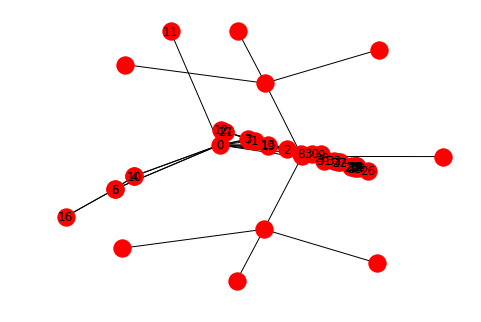

In [21]:
G = nx.karate_club_graph()

# https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html

nx.draw_spectral(G, with_labels=True)
plt.show()

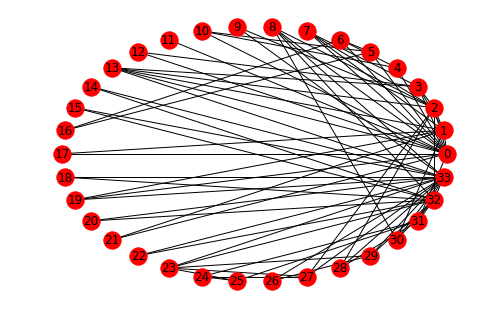

In [22]:
nx.draw_circular(G, with_labels=True)
plt.show()

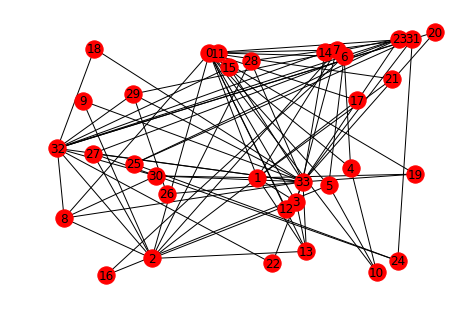

In [23]:
nx.draw_random(G, with_labels=True)
plt.show()

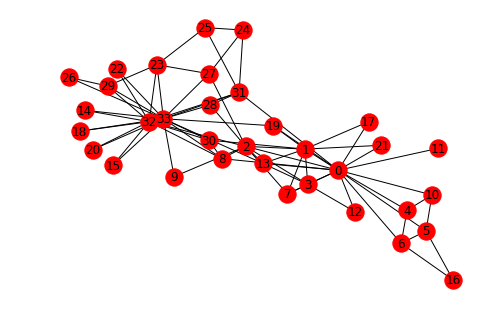

In [24]:
#На мой взгляд наиболее содержательная и интересная раскладка

nx.draw_spring(G, with_labels=True)
plt.show()

#Можно ли сказать на основе визуализации, кто является менеджером, а кто - тренером?

In [25]:
#Центральности и гендер

degrees = dict(nx.degree(G))
degrees

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

In [26]:
#Объединим все центральности для Karate в одну большую базу данных

degree_Karate = nx.degree_centrality(G)
closeness_Karate = nx.closeness_centrality(G)
eigenvector_Karate = nx.eigenvector_centrality(G)
betweenness_Karate = nx.betweenness_centrality(G)

In [27]:
#Присоедините к базе остальные центральности
n = len(G.nodes())
deg = np.zeros(n)
cl = np.zeros(n)
eig = np.zeros(n)
bw = np.zeros(n)
i=0
for node in G:
    deg[i] = degree_Karate[node] #нормализованная центральность
    cl[i] = closeness_Karate[node]
    eig[i] = eigenvector_Karate[node]
    bw[i] = betweenness_Karate[node]
    i+=1
    
centralities = pd.DataFrame()
centralities['nodes'] = G.nodes()
centralities.set_index(['nodes'], inplace=True)
centralities['eigenvector_Karate'] = pd.DataFrame.from_dict(eigenvector_Karate, orient='index')
centralities['closeness_Karate'] = pd.DataFrame.from_dict(closeness_Karate, orient='index')
centralities['degree_Karate'] = pd.DataFrame.from_dict(degree_Karate, orient='index')
centralities['betweenness_Karate'] = pd.DataFrame.from_dict(betweenness_Karate, orient='index')
centralities.head()

,eigenvector_Karate,closeness_Karate,degree_Karate,betweenness_Karate
nodes,,,,
0,0.355483,0.568966,0.484848,0.437635
1,0.265954,0.485294,0.272727,0.053937
2,0.317189,0.559322,0.303030,0.143657
3,0.211174,0.464789,0.181818,0.011909
4,0.075966,0.379310,0.090909,0.000631


In [45]:
#Рассчитаем взаимосвязи (корреляцию) между всеми типами центральностей. Что это нам дает?
corr = centralities.corr()
corr

,eigenvector_Karate,closeness_Karate,degree_Karate,betweenness_Karate
eigenvector_Karate,1.000000,0.904615,0.917255,0.803213
closeness_Karate,0.904615,1.000000,0.771591,0.717945
degree_Karate,0.917255,0.771591,1.000000,0.914643
betweenness_Karate,0.803213,0.717945,0.914643,1.000000


Выгрузите социальную сеть с набором индивидуальных характеристик и сопоставьте показатели центральности с индивидуальными характеристиками. 
https://www.stats.ox.ac.uk/~snijders/siena/ Description students data sets van de Bunt

1) Рассчитайте средние показатели входящей и исходящей центральностей. Нарисуйте распределение центральностей. Какие особенности Вы видите?

2) Сопоставьте средние показатели входящей и исходящей центральностей для мальчиков и девочек. (Как Вы думаете, какой тест может быть для этого использован, а какой - нет)?

3) Сравните средние ранги для центральностей девочек и мальчиков/ или курящих и некурящих, используйте любые показатели, деление на которые Вам кажется интересным (rank_degree=rankdata(centralities['degree'])). Скажите, для чего это может быть нужно и в каких случаях используется такой подход? 

4) Сопоставьте другие центральности для мальчиков и девочек. 

5) Используя метод k-средних (или другой метод кластерного анализа,), выделите типичные сценарии поведения учащихся и интерпретируйте их.